<a href="https://colab.research.google.com/github/sijuswamy/AIML_Files/blob/main/CNN_MNIST_(Fashion)optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## MNIST Fashion Dataset

Fashion MNIST Clothing Classification
The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

It is a more challenging classification problem than MNIST and top results are achieved by deep learning convolutional neural networks with a classification accuracy of about 90% to 95% on the hold out test dataset.




# Step-1: Loading libraries



In [12]:
# CNN using tf.Keras - MIST Fashion Dataset
#from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing both TensorFlow and its high level API - Keras.
import tensorflow as tf
from tensorflow import keras
# Setting the random seeds for repeatability
tf.random.set_seed(1)
np.random.seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, BatchNormalization,MaxPooling2D, Flatten
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import RMSprop


## Step-2 Loading dataset

In [13]:
# Load the dataset from sklearn
fashionDB = keras.datasets.fashion_mnist


# Step-3 Data Preprocessing



Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


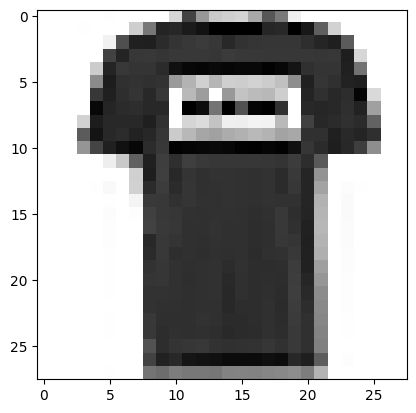

In [14]:
# Setting the random seeds for repeatability
(X_train, y_train),(X_test, y_test) = fashionDB.load_data()
print("Shape of X_train: ", X_train.shape)
# Shape of X_train:  (60000, 28, 28)
print("Shape of X_test: ", X_test.shape)
# Shape of X_test:  (10000, 28, 28)
# We can view the dataset with matplotlib
plt.imshow(X_train[1], cmap='binary')
plt.show()


## Plotting few images


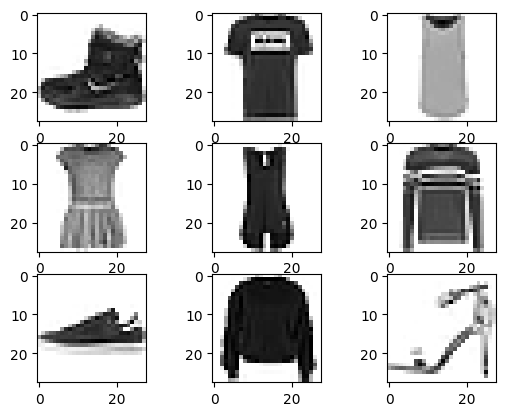

In [6]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray_r')
# show the figure
plt.show()

# Step-4  Feature Scaling- for Convolutional Neural Network

In [15]:
X_train = X_train.reshape((60000, 28, 28, 1))
# divided with 255 to bring down the range to 0 to 1.
X_train = X_train.astype('float32')/255
# Similar operations are done to 10000 testing images.
# Flattening 2D image to 1D representation.
X_test = X_test.reshape((10000, 28, 28, 1))
# Scale pixel values to range 0 to 1.
X_test = X_test.astype('float32')/255


#Step 5 Deep Neural Net Architecture with 3 hidden layers

In [8]:
X_train.shape[1:]

(28, 28, 1)

In [16]:
# Create neural network using keras API
# Sequential() does linear stacking of layers
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
# Here begins the fully connected part (DNN) of ConvNet
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                      

# Step-6 Model Compiling Training

In [17]:
# Compile the network model with relevant configurations.
# loss, optimizer and metrics are three important configurations.

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#optimizer=RMSprop() also can be used


### Model Visualization


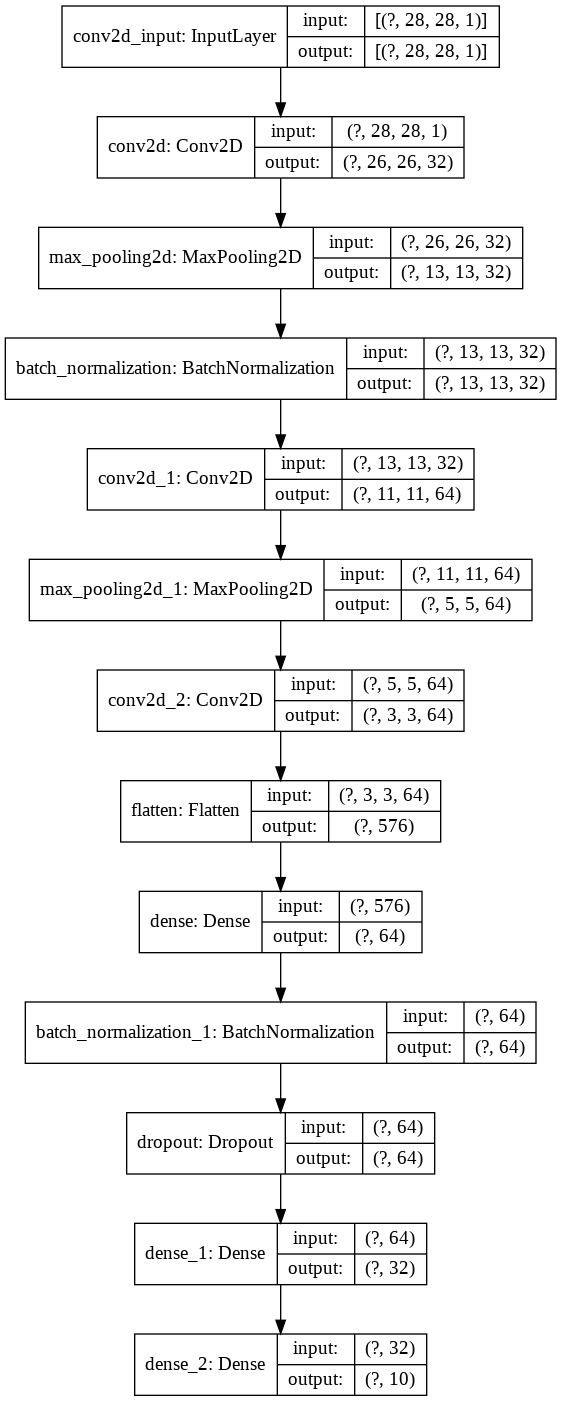

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

## Target Label encoding

In [18]:
# convert class vectors to binary class matrices
num_classes=10
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


## Model Training

In [19]:

cb_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=4,
                                                  restore_best_weights=True)
cb_model_checkpoint = keras.callbacks.ModelCheckpoint("bestModel_MNIST_Fashion.h5",
                                                      save_best_only=True)
history = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10,
batch_size=16,callbacks=[cb_early_stopping,cb_model_checkpoint])

Epoch 1/10
3375/3375 [==============================] - 88s 25ms/step - loss: 0.4641 - accuracy: 0.8366 - val_loss: 0.3049 - val_accuracy: 0.8885
Epoch 2/10
3375/3375 [==============================] - 87s 26ms/step - loss: 0.3293 - accuracy: 0.8815 - val_loss: 0.3327 - val_accuracy: 0.8818
Epoch 3/10
3375/3375 [==============================] - 84s 25ms/step - loss: 0.2867 - accuracy: 0.8966 - val_loss: 0.2743 - val_accuracy: 0.9012
Epoch 4/10
3375/3375 [==============================] - 82s 24ms/step - loss: 0.2621 - accuracy: 0.9054 - val_loss: 0.2990 - val_accuracy: 0.8930
Epoch 5/10
3375/3375 [==============================] - 85s 25ms/step - loss: 0.2392 - accuracy: 0.9127 - val_loss: 0.2888 - val_accuracy: 0.8982
Epoch 6/10
3375/3375 [==============================] - 85s 25ms/step - loss: 0.2240 - accuracy: 0.9188 - val_loss: 0.2455 - val_accuracy: 0.9120
Epoch 7/10
3375/3375 [==============================] - 83s 25ms/step - loss: 0.2089 - accuracy: 0.9243 - val_loss: 0.2606 -

## Displaying the learning of the network

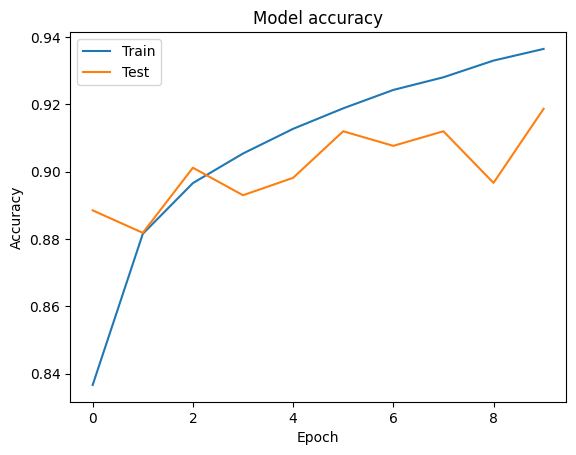

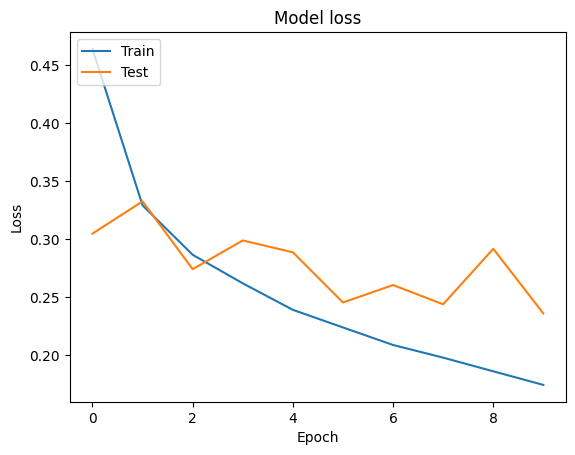

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Step-7  Model Evaluation

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26152119040489197
Test accuracy: 0.9110000133514404


#Step-8 Confusion Matrix





In [22]:
y_prob = model.predict(X_test)
from sklearn.metrics import confusion_matrix
y_pred=np.argmax(y_prob, axis=1)
#print(y_pred)
#y_pred.shape
y_temp=y_test>0.5
y_temp=np.argmax(y_temp,axis=1)
cm = confusion_matrix(y_true = y_temp, y_pred=y_pred)
print(cm)

313/313 [==============================] - 4s 11ms/step
[[840   1  17  28   1   1 102   0  10   0]
 [  0 972   1  17   5   0   3   0   2   0]
 [ 14   0 827   7  73   0  78   0   1   0]
 [  9   1  10 916  24   0  34   0   6   0]
 [  2   0  24  24 881   0  67   0   2   0]
 [  0   0   0   0   0 984   0  10   0   6]
 [ 92   0  43  26  61   0 767   0  11   0]
 [  0   0   0   0   0   7   0 980   0  13]
 [  0   0   1   3   1   0   5   2 988   0]
 [  0   0   0   0   0   4   0  38   3 955]]


In [24]:
from sklearn.metrics import classification_report
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]
pred=model.predict(X_test)
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1),
	target_names=labelNames))

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

         top       0.88      0.84      0.86      1000
     trouser       1.00      0.97      0.98      1000
    pullover       0.90      0.83      0.86      1000
       dress       0.90      0.92      0.91      1000
        coat       0.84      0.88      0.86      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.73      0.77      0.75      1000
     sneaker       0.95      0.98      0.97      1000
         bag       0.97      0.99      0.98      1000
  ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Displaying predicted image and actual image using matplotlib

In [ ]:
print(np.argmax(y_test[1]))# actual class of the first item in X_test

2


In [ ]:
y_score=model.predict(X_test)
print(np.argmax(y_score[1]))#predicted class of the first item in y_score


2


### Corresponding Actual Image in y_test

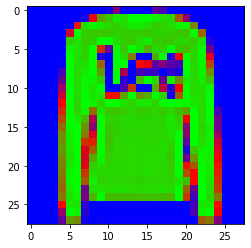

In [ ]:
testImage = (np.array(X_test[1], dtype='float')).reshape(28,28)
plt.imshow(testImage,cmap='brg')